## Using Pandas and visualising our data

In this practical we are going to work with Pandas and Matplotlib and/ or Seaborn. Our aim is to do the following:

1. Read in a file from a CSV to a Panda's dataframe
2. Inspect the data and remove rows containing erroneous data
3. Clean some corrupted values in the data 
4. Summarise, explore and visualise the data in some meaningful way

The dataset we are going to work with are 10000 randomly selected rows from SwissNames3D, a gazetteer of placenames made available by [SwissTopo](https://www.swisstopo.admin.ch/de/geodata/landscape/names3d.html). I have preprocessed the data a little, removing some rows, and introducing errors to some values. The file name is ´swissNAMES_3D_sample_with_errors.csv´. It is in this directory, so you can load it directly by writing:

`df = pd.read_csv('swissNAMES_3D_sample_with_errors.csv',  encoding = 'utf8')`

You can find out more about the data and the meanings of the different attributes on the SwissTopo page linked to above. 

You should first of all prepare the data (steps 1-3 above). Once you are satisfied that the data are ready for analysis, think about some interesting ways to explore these data, discuss them with the tutors, and produce at least two plots showing some properties of the gazetteer.

Below you will find some very simple examples of most of the important steps that you will carry out in the work.

In [3]:
import pandas as pd

# Read in data from a csv - hints, check the separator and the format of the text you are loading

df = pd.read_csv('swissNAMES_3D_sample_with_errors.csv',  encoding = 'utf8')

# We drop the first and irrelavant column

df.drop(columns = ['Unnamed: 0'], inplace=True)

# We search for odd values and drop them

values = ['k_W']
value = [0]
df = df[df.SPRACHCODE.isin(values) == False]
df = df[df.E.isin(value) == False]
df = df[df.N.isin(value) == False]
df['Z,,'] = df['Z,,'].map(lambda x: x.strip(',,'))
df.rename(columns = {'Z,,':'Z'}, inplace = True)
df = df.astype({"Z": int})

# We diplay information about the dataframe and print it to the screen

df.info(verbose=True)
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UUID        9693 non-null   object
 1   OBJEKTART   9693 non-null   object
 2   NAME        9693 non-null   object
 3   SPRACHCODE  9693 non-null   object
 4   E           9693 non-null   int64 
 5   N           9693 non-null   int64 
 6   Z           9693 non-null   int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 567.9+ KB
                                        UUID            OBJEKTART  \
0     {7B12C33C-9FFB-4AF8-AE8C-C7745BE6A304}  Lokalname swisstopo   
1     {42066385-6B4D-4E0F-A178-6617B11073AA}   Flurname swisstopo   
2     {6F962642-DE66-4C7E-9FB4-3ECDBDEF925F}   Flurname swisstopo   
3     {07711514-E3F7-4FBE-B917-703241F21BF2}   Flurname swisstopo   
4     {43BC5913-6A2E-40B5-8B3E-4E6BCCCFD2E3}   Flurname swisstopo   
...                                      ...              

In [4]:
# Here we use some commands to summarise the dataframe in different ways

print(df.dtypes)     #Lists the columns and their data types
print()

print(df.describe()) #Summarises the numerical values
print()

# We summarise the properties of categorical columns

print(df['SPRACHCODE'].value_counts())
print()
print(df['NAME'].value_counts())
print()
print(df['OBJEKTART'].value_counts())

UUID          object
OBJEKTART     object
NAME          object
SPRACHCODE    object
E              int64
N              int64
Z              int32
dtype: object

                  E             N            Z
count  9.693000e+03  9.693000e+03  9693.000000
mean   2.662954e+06  1.198028e+06   912.460023
std    6.894382e+04  5.022449e+04   564.376196
min    2.486278e+06  1.077356e+06   193.000000
25%    2.608427e+06  1.163395e+06   499.000000
50%    2.665123e+06  1.200664e+06   688.000000
75%    2.717375e+06  1.241764e+06  1197.000000
max    2.832851e+06  1.295425e+06  4434.000000

Hochdeutsch inkl. Lokalsprachen           6563
Franzoesisch inkl. Lokalsprachen          1647
Italienisch inkl. Lokalsprachen            882
Rumantsch Grischun inkl. Lokalsprachen     587
Mehrsprachig                                14
Name: SPRACHCODE, dtype: int64

Weid                 20
Büel                 18
Oberdorf             13
Rüti                 12
Moos                 12
                     ..
A R

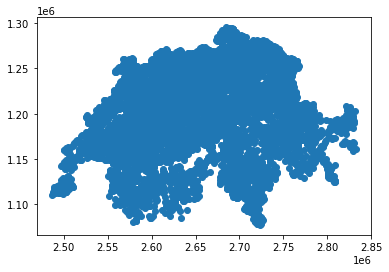

In [5]:
# We display a simple scatter plot of the distribution of the points in the gazetteer that renders a nice depiction of Switzerland

import matplotlib.pyplot as plt  

x = df['E'].tolist()
y = df['N'].tolist()

plt.scatter(x, y)       # scatter plot pairs of xs and ys
plt.show()     

Text(0.5, 1.0, 'Language Spoken North and South')

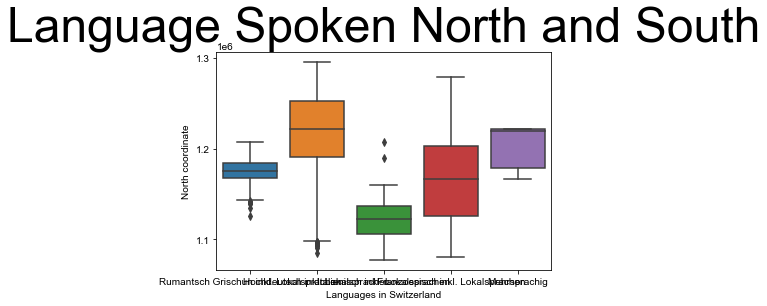

In [6]:
# Box plot of language spoken against north/south extension

import seaborn as sns 

p= sns.boxplot(data=df, x='SPRACHCODE', y='N')
sns.set(rc = {'figure.figsize':(80,80)})
sns.set(font_scale = 4)
p.set_xlabel("Languages in Switzerland")
p.set_ylabel("North coordinate")
p.set_title("Language Spoken North and South")

Text(0.5, 1.0, 'Language Spoken East and West')

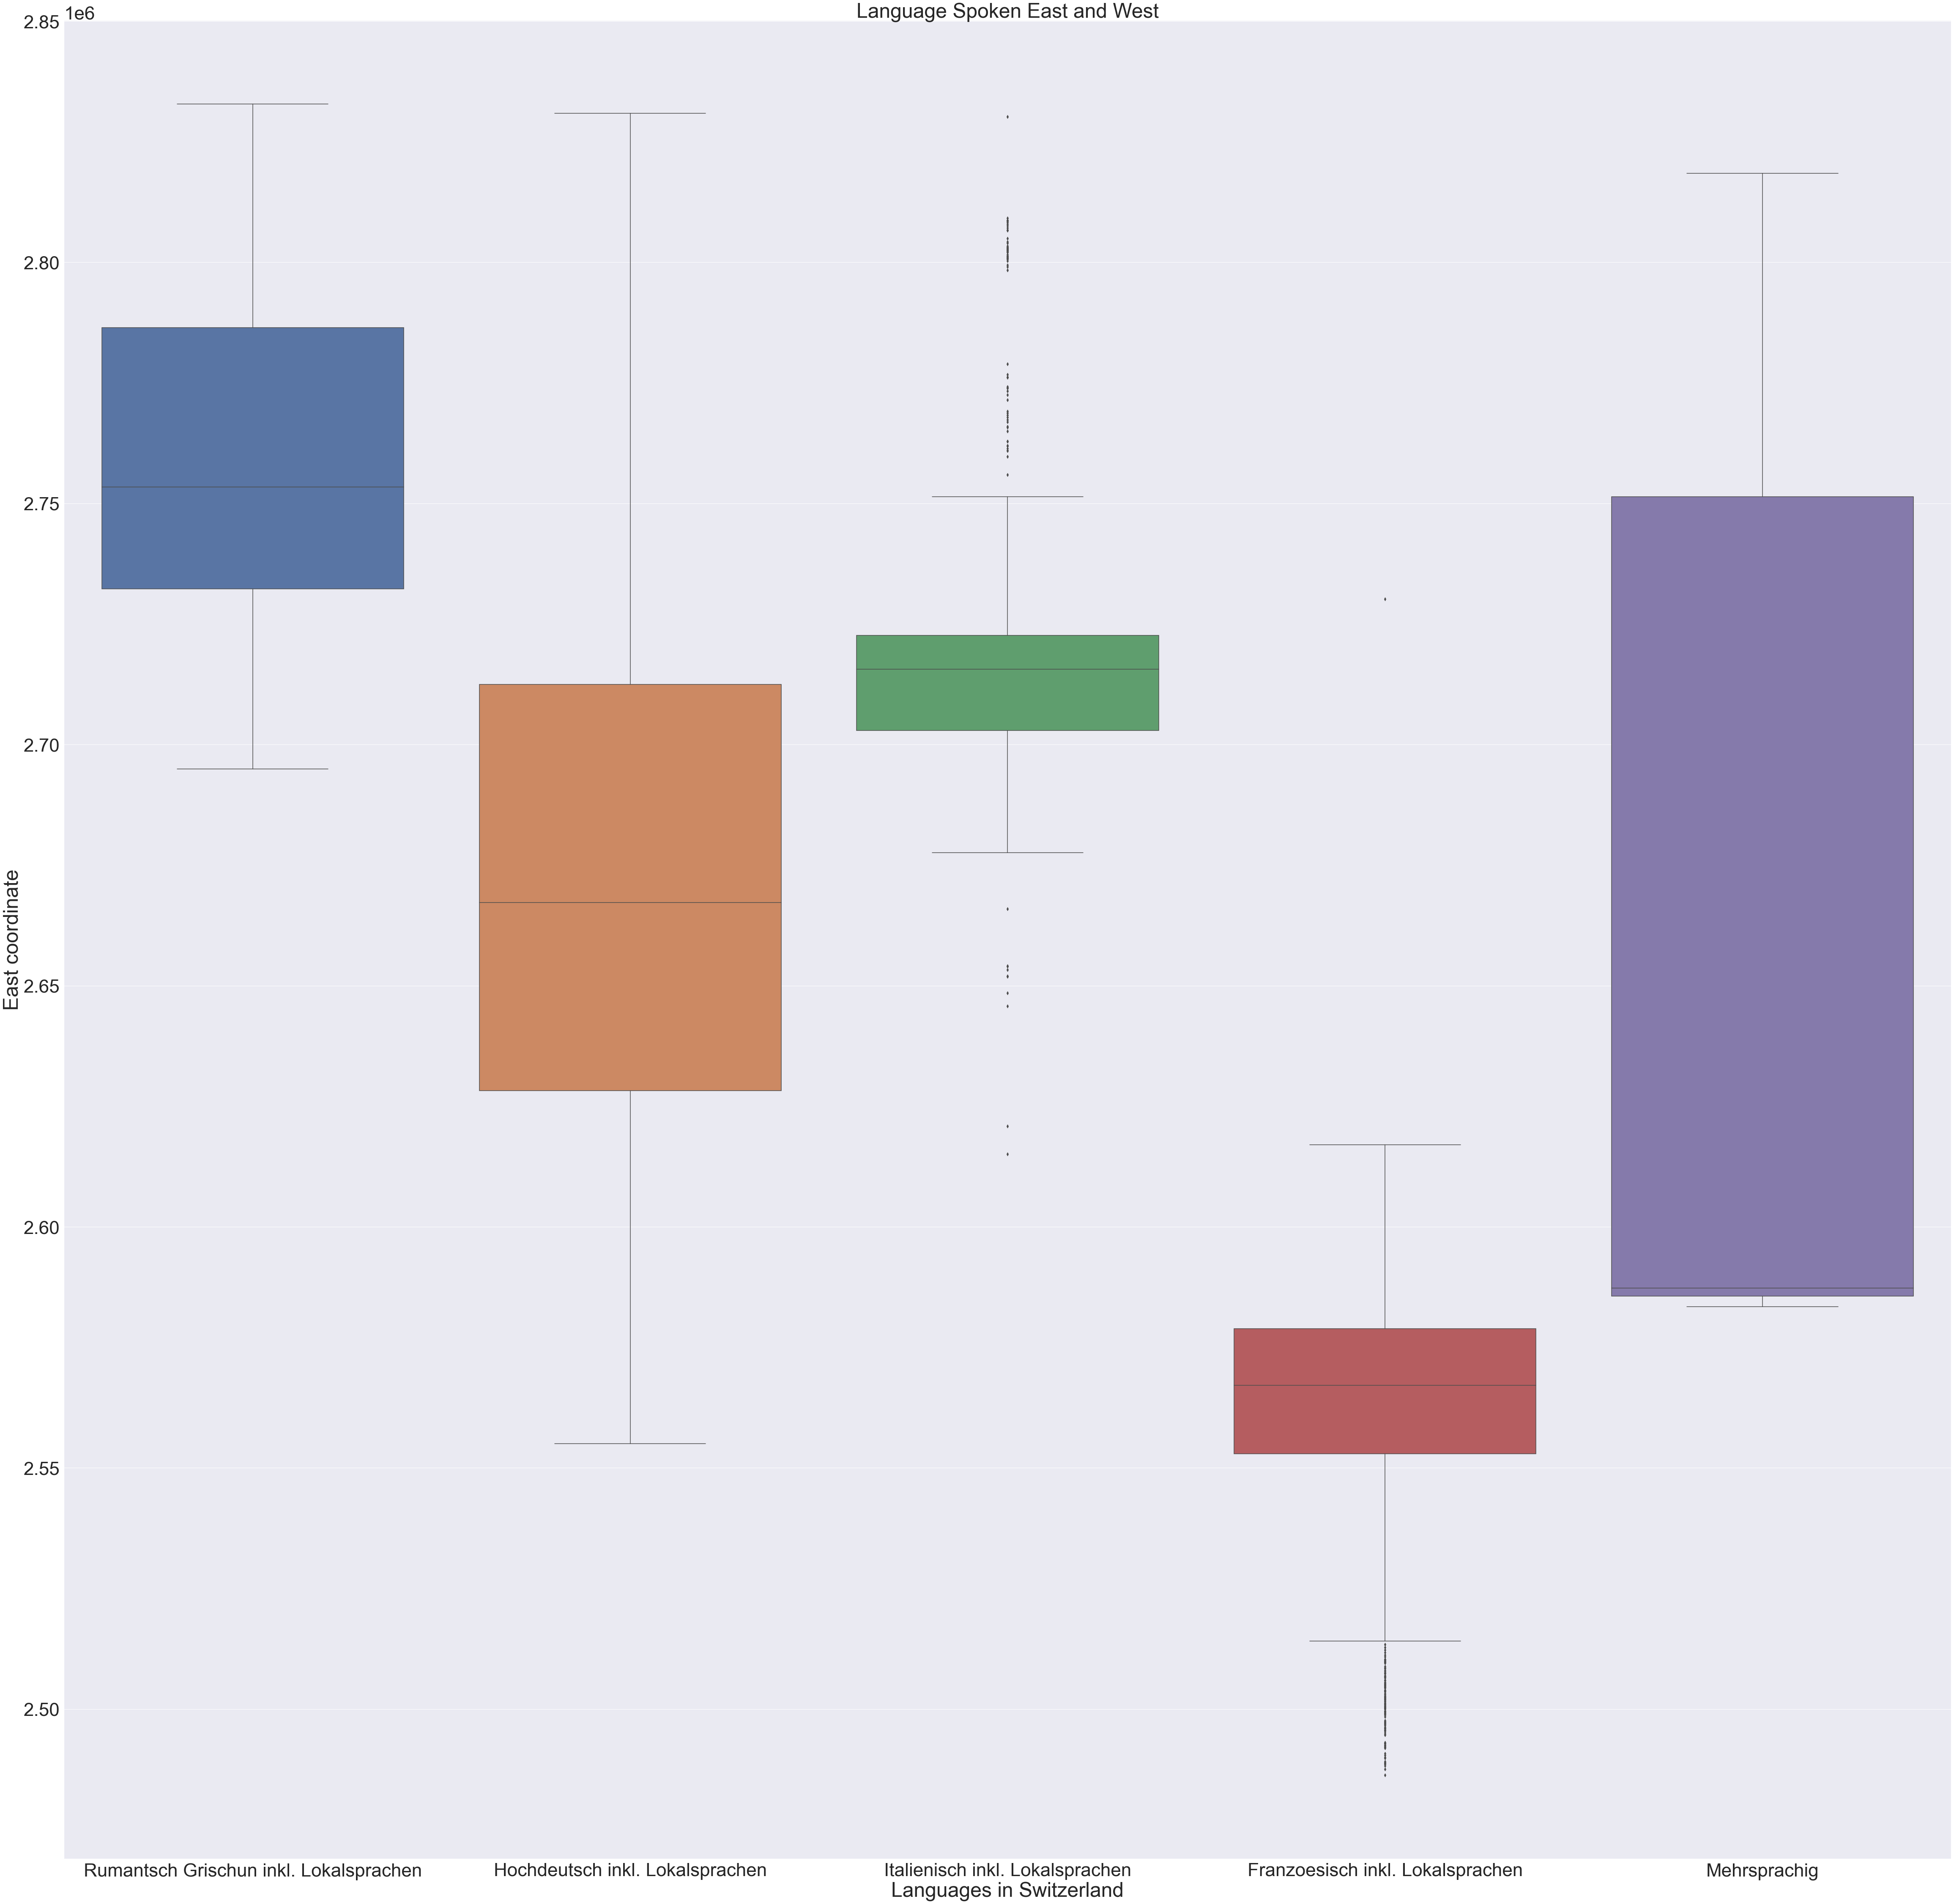

In [7]:
# Box plot of language spoken against east/west extension

import seaborn as sns 

p= sns.boxplot(data=df, x='SPRACHCODE', y='E')
sns.set(rc = {'figure.figsize':(80,80)})
sns.set(font_scale = 4)
p.set_xlabel("Languages in Switzerland")
p.set_ylabel("East coordinate")
p.set_title("Language Spoken East and West")